# Correr experimentos
En este archivo está el código para correr los experimentos y escribir los resultados en archivos CSV.
> Los archivos se guardan en la carpeta _resultados_.

In [1]:
import math, subprocess
import pandas as pd
import time
import filecmp
#from IPython.core.debugger import set_trace
#set_trace()
from os import listdir, getcwd
from os.path import isfile, join
import matplotlib.pyplot as plt

La siguiente función sirve para correr el código sobre una instancia particular.
- TA: Test aleatorio

In [6]:
def correr_experimento(archivo_instancia, p):
    start = time.time()
    
    # Crear proceso para ejecutar el codigo.
    output_dir = join(getcwd(), 'resultados')
    process = subprocess.Popen(["../../src/tp1", archivo_instancia, str(p)], cwd=output_dir)

    # Correr experimento.
    exit_code = process.wait()

    # Verificar que el proceso no fallo.
    if exit_code != 0: raise(Exception(F"Hubo un error en la experimentacion para el algoritmo con la instancia {archivo_instancia}."))
    
    end = time.time()
    return end-start;

## Agregamos los experimentos
el codigo de por si guarda el resultado de las ejecuciones en un txt.

### Experimento 1

In [24]:
experimentos = [];
#experimentos.append(("../../tests/test_15_segundos.txt", 0.9))
#experimentos.append(("../../tests/test_30_segundos.txt", 0.8))
#experimentos.append(("../../tests/test_aleatorio_desordenado.txt", 0.76))
#experimentos.append(("../../tests/test_completo.txt", 0.5))
#experimentos.append(("../../tests/test_sin_links.txt", 0.64))
#experimentos.append(("../../tests/test_trivial.txt", 0.3))
#######################################
experimentos.append(("../instancias/3 Principales/1000_paginas_200_links_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales/1000_paginas_400_links_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales/1000_paginas_600_links_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales/1000_paginas_800_links_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales/1000_paginas_1000_links_P_0.7.txt", 0.7))
#######################################
experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.txt", 0.0))
experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.2.txt", 0.2))
experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.4.txt", 0.4))
experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.6.txt", 0.6))
experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.8.txt", 0.8))
experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_1.txt", 1.0))
#######################################
experimentos.append(("../instancias/3 Principales y Anillo/832_Inicio_1000_paginas_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales y Anillo/899_Inicio_1000_paginas_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales y Anillo/959_Inicio_1000_paginas_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales y Anillo/994_Inicio_1000_paginas_P_0.7.txt", 0.7))
#######################################
experimentos.append(("../instancias/3 Principales Apuntando a otra/1_apuntando_1000_paginas_500_links_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales Apuntando a otra/2_apuntando_1000_paginas_500_links_P_0.7.txt", 0.7))
experimentos.append(("../instancias/3 Principales Apuntando a otra/3_apuntando_1000_paginas_500_links_P_0.7.txt", 0.7))

## Ejecutar los experimentos.
Este paso puede tardar unos minutos hasta terminar de ejecutarse.

In [25]:
numero_de_experimento = 1
numero_de_repeticiones = 5 # Aumentar para mayor precisión con los tiempos
for (archivo, p) in experimentos:
    
    # Voy mostrando que experimento se esta ejecutando.
    print('Corriendo experimento: %i/%i (%s)' % (numero_de_experimento, len(experimentos), archivo))
    
    tiempos = []
    for repeticion in range(numero_de_repeticiones):
        tiempo_de_ejecucion = correr_experimento(archivo, p);
        tiempos.append(tiempo_de_ejecucion)
    
    print('Estadísticas de los tiempos de ejecución:')
    print(pd.Series(tiempos).describe())
    
    numero_de_experimento += 1

Corriendo experimento: 1/18 (../instancias/3 Principales/1000_paginas_200_links_P_0.7.txt)
Estadísticas de los tiempos de ejecución:
count    5.000000
mean     0.159325
std      0.015529
min      0.143787
25%      0.144995
50%      0.159606
75%      0.167794
max      0.180445
dtype: float64
Corriendo experimento: 2/18 (../instancias/3 Principales/1000_paginas_400_links_P_0.7.txt)
Estadísticas de los tiempos de ejecución:
count    5.000000
mean     0.167742
std      0.005731
min      0.161491
25%      0.162007
50%      0.169252
75%      0.171911
max      0.174047
dtype: float64
Corriendo experimento: 3/18 (../instancias/3 Principales/1000_paginas_600_links_P_0.7.txt)
Estadísticas de los tiempos de ejecución:
count    5.000000
mean     0.197575
std      0.018106
min      0.187539
25%      0.188747
50%      0.188793
75%      0.193047
max      0.229747
dtype: float64
Corriendo experimento: 4/18 (../instancias/3 Principales/1000_paginas_800_links_P_0.7.txt)
Estadísticas de los tiempos de ej

## Comparamos resultados
Comparamos la carpeta "resultados" con la carpeta "resultados esperados".

In [ ]:
resultados = [f for f in listdir("resultados") if isfile(join("resultados", f))]
esperados = [f for f in listdir("resultados_esperados") if isfile(join("resultados_esperados", f))]
common_elements = list(set(resultados).intersection(set(esperados)))
for name in common_elements:
    print(">>>>>> Comparado el archivo %s" % (name))
    resultado = open(join("resultados", name))
    esperado = open(join("resultados_esperados", name))
    lineas_resultado = resultado.readlines()
    lineas_esperado = esperado.readlines()
    if len(lineas_resultado) != len(lineas_esperado):
        print("No contienen la misma cantidad de lineas.")
        continue
    if len(lineas_resultado) == 0:
        print("Los archivos están vacíos.")
        continue
    if lineas_resultado[0] != lineas_esperado[0]:
        print("Los P utilizados son distintos por lo que no tiene sentido comparar.")
        continue
    diferencias = []
    for i in range(len(lineas_resultado)):
        if abs(float(lineas_resultado[i]) - float(lineas_esperado[i])) > 10e-4:
            print("En la linea %i el valor %s del resultado es distinto al valor %s del esperado." % (i, lineas_resultado[i], lineas_esperado[i]))
        diferencias.append(abs(float(lineas_resultado[i]) - float(lineas_esperado[i])))
    print("Estadísticas de las diferencias:")
    print(pd.Series(diferencias).describe())
print(">>>>>> Terminado de comparar todos los archivos")

In [ ]:
experimentos = [];

In [ ]:
archivo = open("archivo")
lineas = archivo.readlines()
p = lineas[0]
resultado = lineas[1:]
resultado[5]
pd.Series(resultado)

[0.0602609, 0.106588, 0.141776, 0.170357, 0.197674]
[0.0295182, 0.0506199, 0.0674239, 0.075039, 0.083098]
[0.0120918, 0.020597, 0.0273813, 0.0310699, 0.030233]


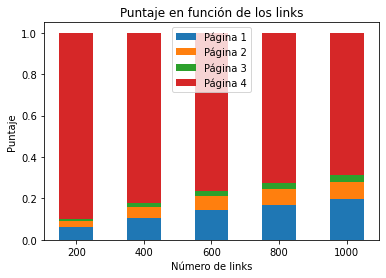

In [28]:
# Grafico de linea puntaje en función de links para las tres páginas principales y la suma del resto
archivos_links = [
    (".\\resultados\\1000_paginas_200_links_P_0.7.txt.out", 200),
    (".\\resultados\\1000_paginas_400_links_P_0.7.txt.out", 400),
    (".\\resultados\\1000_paginas_600_links_P_0.7.txt.out", 600),
    (".\\resultados\\1000_paginas_800_links_P_0.7.txt.out", 800),
    (".\\resultados\\1000_paginas_1000_links_P_0.7.txt.out", 1000),
]

links = [200, 400, 600, 800, 1000]
pagina1 = []
pagina2 = []
pagina3 = []
resto = []

for (nombre_archivo, nro_links) in archivos_links:
    archivo = open(nombre_archivo)
    lineas = archivo.readlines()
    p = lineas[0]
    resultado = [float(linea) for linea in lineas[1:]]
    pagina1.append(resultado[0])
    pagina2.append(resultado[1])
    pagina3.append(resultado[2])
    resto.append(sum(resultado[3:]))

# plt.plot(links, pagina1, label="Página 1")
# plt.plot(links, pagina2, label="Página 2")
# plt.plot(links, pagina3, label="Página 3")
# plt.plot(links, resto.values(), label="Suma del resto")
plt.bar(links, pagina1, width=100, label="Página 1")
plt.bar(links, pagina2, width=100, bottom=pagina1, label="Página 2")
plt.bar(links, pagina3, width=100, bottom=[pagina1[i]+pagina2[i] for i in range(len(pagina1))], label="Página 3")
plt.bar(links, resto, width=100, bottom=[pagina1[i]+pagina2[i]+pagina3[i] for i in range(len(pagina1))], label="Página 4")
plt.xlabel("Número de links")
plt.ylabel("Puntaje")
plt.title("Puntaje en función de los links")
plt.legend()
plt.savefig('.\\graficos\\puntaje_funcion_links.png')
plt.show()
plt.close()

In [26]:
plt.clf()

<Figure size 432x288 with 0 Axes>